In [11]:
import os
import sys
import sklearn
from preamble import *
import matplotlib

X.shape: (26, 2)


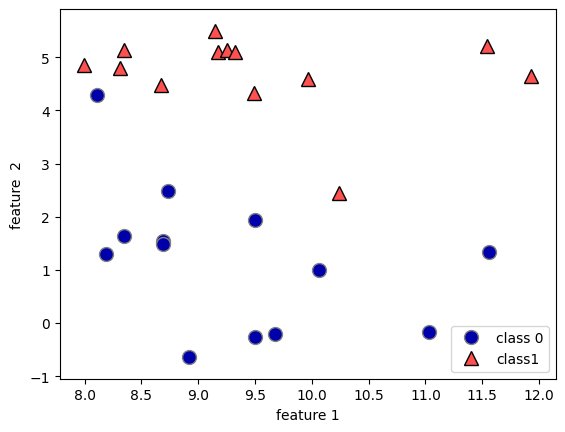

In [13]:
#데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
#산점도를 그립니다
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["class 0", "class1"], loc=4)
plt.xlabel("feature 1")
plt.ylabel("feature  2")
print("X.shape:", X.shape)
plt.show()

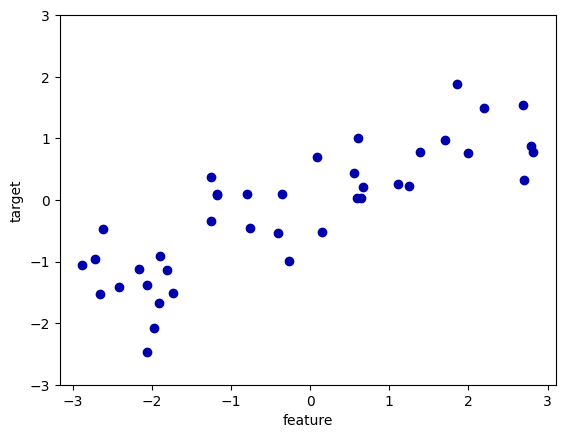

In [14]:
X, y= mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [16]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [17]:
print("클래스별 샘플 갯수:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [18]:
print("특성 이름: \n", cancer.feature_names)

특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# 보스턴 주택 초기설정

In [19]:
# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 다음과 같이 코드를 수정합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("데이터의 형태:", data.shape)

데이터의 형태: (506, 13)


In [20]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


In [ ]:
#K-NN classification

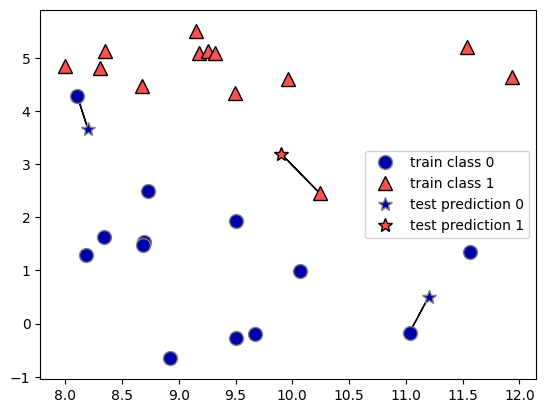

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

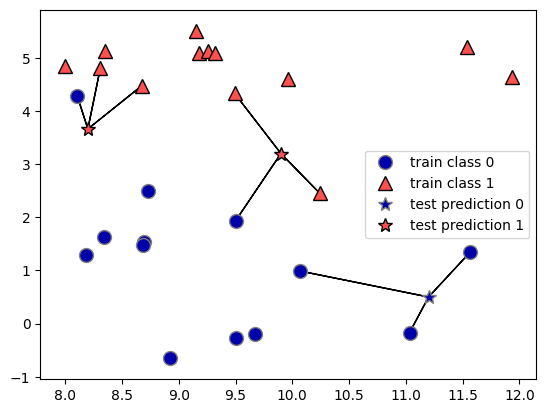

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)

(19, 2)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [26]:
print("테스트 세트 정확도:{:.2f}", format(clf.score(X_test, y_test)))

테스트 세트 정확도:{:.2f} 0.8571428571428571


In [ ]:
# KNeighborsClassifier 분석

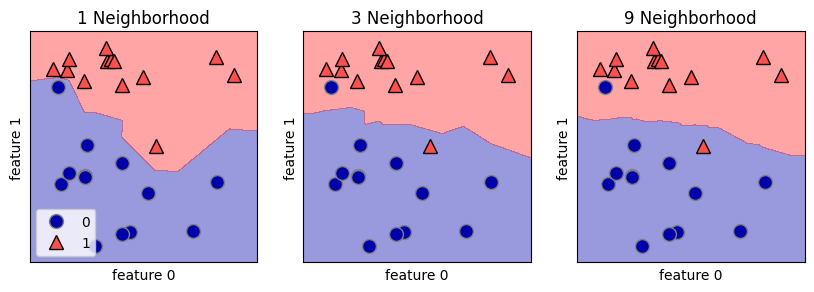

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} Neighborhood".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show() # 책에는 없음

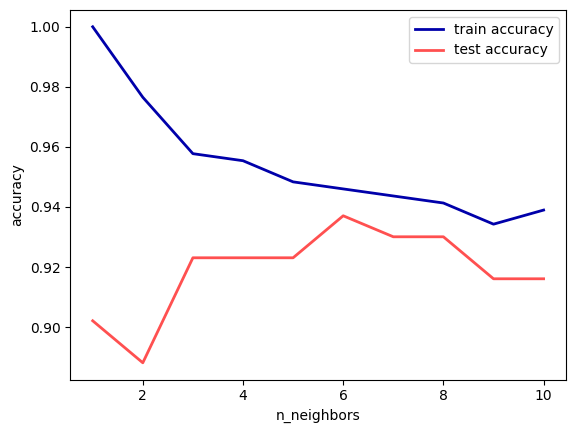

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #모델생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [ ]:
#K-NN regression

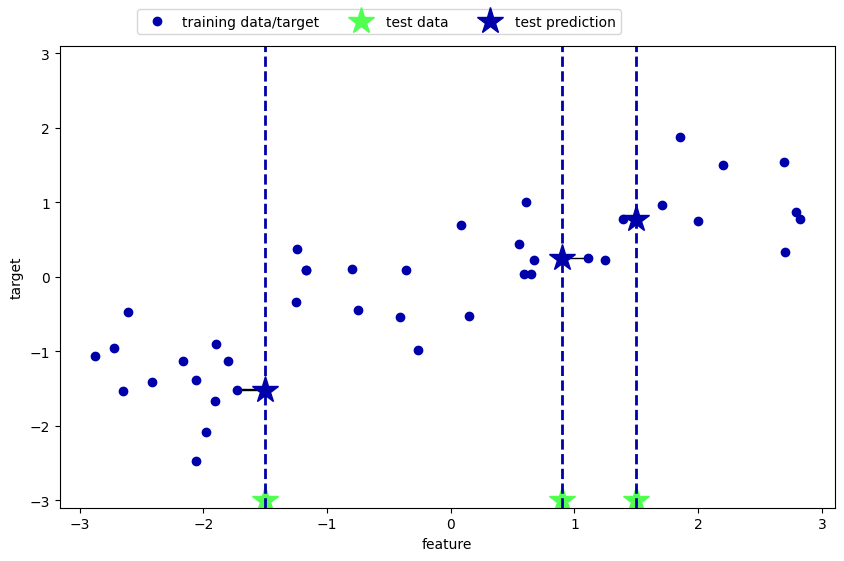

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

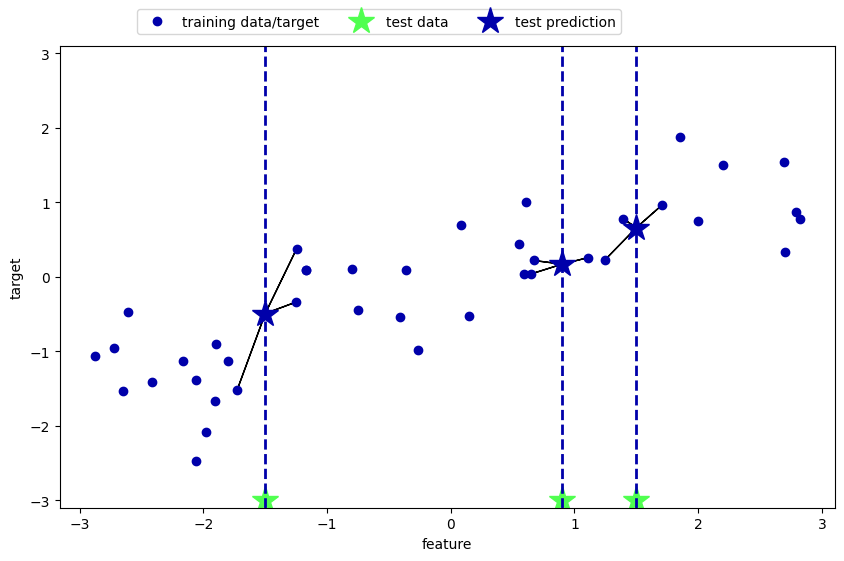

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor (n_neighbors=3)
#훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [38]:
print("테스트 세트 예측 :\n", reg.predict(X_test))

테스트 세트 예측 :
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [39]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


In [ ]:
#KNeighborsRegressor 분석

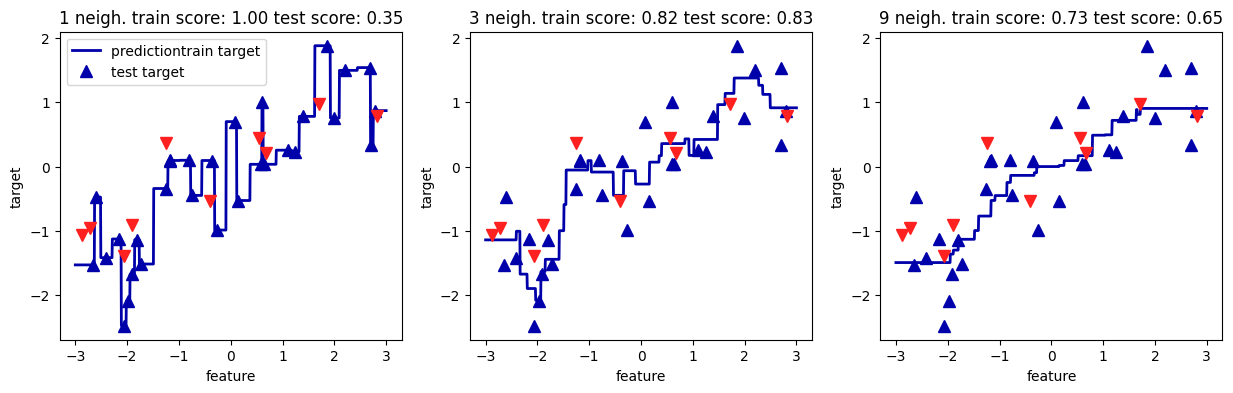

In [44]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
#-3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    #1,3,9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neigh. train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["prediction" "train target", "test target"], loc="best")
plt.show()